(512, 512, 3)
(512, 512, 4)
(512, 512, 3)
255
(512, 512, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


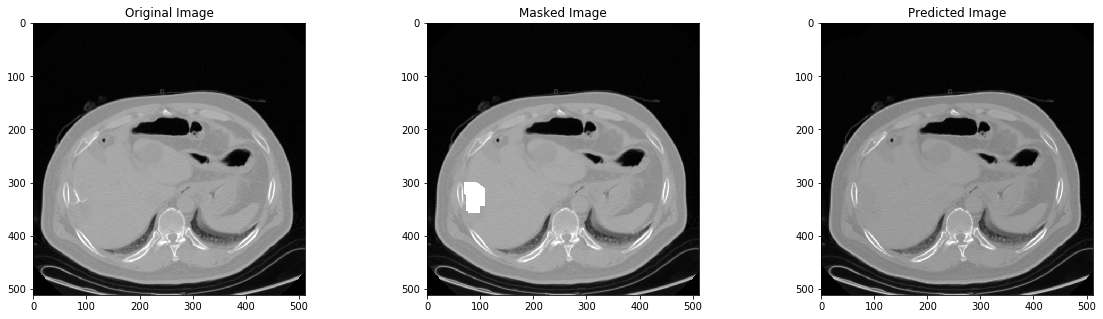

In [32]:
from skimage import io
from copy import deepcopy
import numpy as np
import os
from libs.pconv_model import PConvUnet
from matplotlib import pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = "3"
test_path = "./data/liver_image/test/ct/"
ori = io.imread(test_path + 'img/' + 'test_CT_8.png')
print(ori.shape)
mask = io.imread(test_path + 'mask/' + 'test_CT_8.png')
print(mask.shape)

if mask.shape[2] != 3:
    mask = mask[:, :, 0:3]
print(mask.shape)
# print(np.max(mask))
mask = mask / 255.
mask = 1 - mask
print (ori.max())
#ori = ori / ori.max()
ori = ori / 210.

masked = deepcopy(ori)
masked[mask==0] = 1
print(masked.shape)

ori = np.expand_dims(ori, axis=0)
mask = np.expand_dims(mask, axis=0)
masked = np.expand_dims(masked, axis=0)

model = PConvUnet(weight_filepath='data/logs_ct/')
model.load("data/logs_ct/134_weights_2018-11-29-12-42-14.h5")
pred_img = model.predict([masked, mask])

_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(ori[0])
axes[1].imshow(masked[0])
axes[2].imshow(pred_img[0] * 1.)
axes[0].set_title('Original Image')
axes[1].set_title('Masked Image')
axes[2].set_title('Predicted Image')
plt.savefig(r'data/liver_image/test/img_test_result.png')
plt.show()
plt.close()